In [19]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [20]:
#Read data from external csv file

data=pd.read_csv('housing.csv')
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [21]:
#Format input for neural network

def boolean_conversion(header:str)->np.ndarray:
    """
    Converts yes/no values to 1/0
    """

    values=data[header].values
    for i in range(len(values)):
        if values[i]=='yes':
            values[i]=1
        else:
            values[i]=0
    return values.reshape(-1,1)

#Numerical inputs
numerical_headers=['area','bedrooms','bathrooms','stories','parking']
for column in numerical_headers:
    exec(f"{column}=data['{column}'].values.reshape(-1,1)")
    exec(f"{column}={column}/{column}.max()") #Normalization   

#Boolean inputs
boolean_headers=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for column in boolean_headers:
    exec(f"{column}=boolean_conversion('{column}')")

#Categorical input
furnishingstatus=data['furnishingstatus'].values
for i in range(len(furnishingstatus)):
    if furnishingstatus[i]=='furnished':
        furnishingstatus[i]=1
    elif furnishingstatus[i]=='semi-furnished':
        furnishingstatus[i]=0.5
    else:
        furnishingstatus[i]=0
furnishingstatus = furnishingstatus.reshape(-1,1)

model_in = np.hstack((area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus))
del area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus

In [22]:
#Format expected output

y=data['price'].values
y_multiplier = y.max() #To convert back to original price
y=y/y.max() #Normalization

In [23]:
max_iter=800
learning_rate=0.001
activation_funtion = 'relu'

In [24]:
nn_model=MLPRegressor(hidden_layer_sizes=(512,128,32),max_iter=max_iter,learning_rate_init=learning_rate,activation=activation_funtion)
nn_model.fit(model_in,y)

,loss,'squared_error'
,hidden_layer_sizes,"(512, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,800
,shuffle,True


In [25]:
#Find loss for each iteration

loss_values=[]
for i in range(max_iter):
  nn_model.partial_fit(model_in,y)
  y_pred_partial=nn_model.predict(model_in)
  loss=np.mean((y-y_pred_partial)**2)
  loss_values.append(loss)

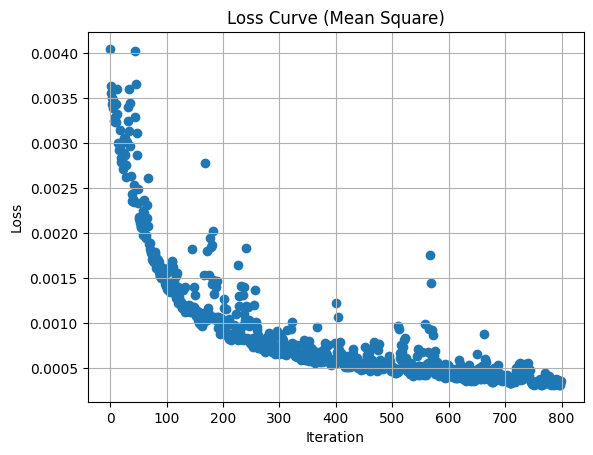

In [26]:
#Plot loss against iterations

plt.scatter(range(max_iter),loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve (Mean Square)')
plt.grid(True)
plt.show()

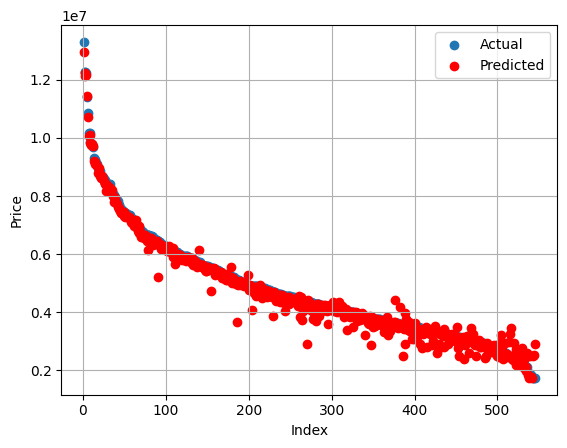

In [27]:
#Plot actual vs predicted values

x = [i for i in range(1,len(y)+1)]

plt.scatter(x,y*y_multiplier,label='Actual')
plt.scatter(x,y_pred_partial*y_multiplier, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()